# L1 and L2 Regularization

**L2 Regularization penalty for weights**

$\Large L_{2w} = \lambda \sum_m w_m^2 $

**L2 Regularization penalty for biases**

$\Large L_{2b} = \lambda \sum_n b_n^2 $

**L1 Regularization penalty for weights**

$\Large L_{1w} = \lambda \sum_m |w_m| $

**L1 Regularization penalty for biases**

$\Large L_{1b} = \lambda \sum_n |b_n| $

$\Large total\_loss = loss + L_{1w} + L_{1b} + L_{2w} + L_{2b} $

In [1]:
def __init__(self, n_input, n_neurons,
            weight_regularizer_l1 = 0,
            weight_regularizer_l2=0,
            bias_regularizer_l1=0,
            bias_regularizer_l2=0):
    self.weight = 0.01 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))
    self.weight_regularizer_l1 = weight_regularizer_l1
    self.weight_regularizer_l2=weight_regularizer_l2
    self.bias_regularizer_l1=bias_regularizer_l1
    self.bias_regularizer_l2=bias_regularizer_l2
    

In [ ]:
def regularization_loss(self, layer):
    regularization_loss = 0
    
    if layer.weight_regularizer_l1 >0:
        regularization_loss += layer.weights_regularizer_l1 * np.sum(np.abs(layer.weights))
    if layer.weight_regularizer_l2 >0:
        regularization_loss += layer.weights_regularizer_l1 * np.sum(layer.weights**2)
    
    if layer.bias_regularizer_l1 >0:
        regularization_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases))
    
    if layer.bias_regularizer_l2 >0:
        regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases**2)
    

In [ ]:
data_loss = loss_function.foward(activation2.output, y)

regularization_loss = loss_function.regularization_loss(dense1) + loss_function.regularization_loss(dense2)

loss = data_loss + regularization_loss

---

**L2 odvod uteži**

$\Large \frac{\partial L_{2w}}{\partial w_m} = \frac{\partial }{\partial w_m}( \lambda \sum_{m}w_m^2) = \lambda \frac{\partial }{\partial w_m}w_m^2 = \lambda 2 w_m$

**L2 odvod bias**

$\Large \frac{\partial L_{2b}}{\partial b_n} = \frac{\partial }{\partial b_n}( \lambda \sum_{n}b_n^2) = \lambda \frac{\partial }{\partial b_n}b_n^2 = \lambda 2 b_n$

---

$\Large 
|x| = 
\left\{
	\begin{array}{ll}
		x  & x > 0 \\
        -x  & x < 0
	\end{array}
\right.
$

Odvod absolutne funkcije je:

$\Large 
|x|' = 
\left\{
	\begin{array}{ll}
		1  & x > 0 \\
        -1  & x < 0
	\end{array}
\right.
$

**L1 odvod uteži**

$\Large \frac{\partial L_{1w}}{\partial w_m} = \frac{\partial }{\partial w_m}( \lambda \sum_m {|w_m|}) = \lambda \frac{\partial }{\partial w_m} |w_m| = \lambda \left\{
	\begin{array}{ll}
		1  & w_m > 0 \\
        -1  & w_m < 0
	\end{array}
\right.$

**L1 odvod bias**

$\Large \frac{\partial L_{1w}}{\partial b_n} = \frac{\partial }{\partial b_n}( \lambda \sum_n {|b_n|}) = \lambda \frac{\partial }{\partial b_n} |b_n| = \lambda \left\{
	\begin{array}{ll}
		1  & b_n > 0 \\
        -1  & b_n < 0
	\end{array}
\right.$

In [3]:
weights = [0.2, 0.8, -0.5]
weights_regularizer_l1 = 0.1 # lambda
dL1 = []
for weight in weights:
    if weight >= 0:
        dL1.append(weights_regularizer_l1*1)
    else:
        dL1.append(weights_regularizer_l1*-1)
dL1

[0.1, 0.1, -0.1]

In [5]:
weights = [[0.2, 0.8, -0.5, 1],
          [0.5, -0.91, 0.26, -0.5],
          [-0.26, -0.27, 0.17, 0.87]]
weights_regularizer_l1 = 0.1 # lambda
dL1 = []
for neuron in weights:
    neuron_dL1 = []
    for weight in neuron:
        if weight >= 0:
            neuron_dL1.append(weights_regularizer_l1*1)
        else:
            neuron_dL1.append(weights_regularizer_l1*-1)
    dL1.append(neuron_dL1)
dL1

[[0.1, 0.1, -0.1, 0.1], [0.1, -0.1, 0.1, -0.1], [-0.1, -0.1, 0.1, 0.1]]

In [6]:
import numpy as np
weights = np.array([[0.2, 0.8, -0.5, 1],
          [0.5, -0.91, 0.26, -0.5],
          [-0.26, -0.27, 0.17, 0.87]])
weights_regularizer_l1 = 0.1 # lambda

dL1 = np.ones_like(weights)
dL1[weights < 0 ] = -1
dL1 = dL1 * weights_regularizer_l1
dL1

array([[ 0.1,  0.1, -0.1,  0.1],
       [ 0.1, -0.1,  0.1, -0.1],
       [-0.1, -0.1,  0.1,  0.1]])

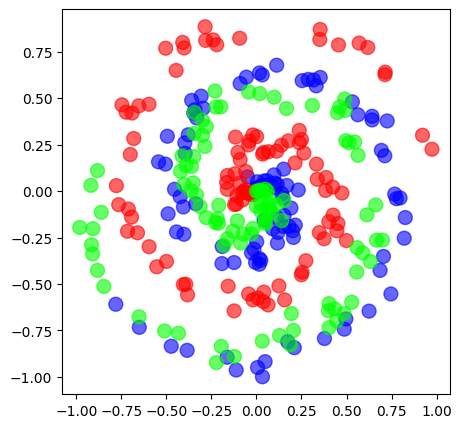

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Copyright (c) 2015 Andrej Karpathy
# License: https://github.com/cs231n/cs231n.github.io/blob/master/LICENSE
# Source: https://cs231n.github.io/neural-networks-case-study/
def spiral_data(samples, classes):
    X = np.zeros((samples*classes, 2))
    y = np.zeros(samples*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(samples*class_number, samples*(class_number+1))
        r = np.linspace(0.0, 1, samples)
        t = np.linspace(class_number*4, (class_number+1)*4, samples) + np.random.randn(samples)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

X, y = spiral_data(100, 3)

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=100, alpha=0.6)
plt.show()

epoch: 0, acc: 0.343, loss: 1.099 (data_loss: 1.099, reg_loss: 0.000), lr: 1
epoch: 100, acc: 0.427, loss: 1.079 (data_loss: 1.079, reg_loss: 0.000), lr: 0.9901970492127933
epoch: 200, acc: 0.443, loss: 1.071 (data_loss: 1.071, reg_loss: 0.000), lr: 0.9804882831650161
epoch: 300, acc: 0.433, loss: 1.070 (data_loss: 1.070, reg_loss: 0.000), lr: 0.9709680551509855
epoch: 400, acc: 0.427, loss: 1.069 (data_loss: 1.069, reg_loss: 0.000), lr: 0.9616309260505818
epoch: 500, acc: 0.417, loss: 1.068 (data_loss: 1.068, reg_loss: 0.000), lr: 0.9524716639679969
epoch: 600, acc: 0.423, loss: 1.067 (data_loss: 1.067, reg_loss: 0.000), lr: 0.9434852344560807
epoch: 700, acc: 0.430, loss: 1.065 (data_loss: 1.065, reg_loss: 0.000), lr: 0.9346667912889054
epoch: 800, acc: 0.437, loss: 1.062 (data_loss: 1.062, reg_loss: 0.000), lr: 0.9260116677470135
epoch: 900, acc: 0.467, loss: 1.057 (data_loss: 1.057, reg_loss: 0.000), lr: 0.9175153683824203
epoch: 1000, acc: 0.437, loss: 1.048 (data_loss: 1.048, reg

epoch: 8600, acc: 0.817, loss: 0.446 (data_loss: 0.446, reg_loss: 0.000), lr: 0.5376633152320017
epoch: 8700, acc: 0.817, loss: 0.444 (data_loss: 0.444, reg_loss: 0.000), lr: 0.5347879565752179
epoch: 8800, acc: 0.813, loss: 0.446 (data_loss: 0.446, reg_loss: 0.000), lr: 0.5319431884674717
epoch: 8900, acc: 0.810, loss: 0.451 (data_loss: 0.451, reg_loss: 0.000), lr: 0.5291285253188
epoch: 9000, acc: 0.810, loss: 0.457 (data_loss: 0.457, reg_loss: 0.000), lr: 0.5263434917627243
epoch: 9100, acc: 0.830, loss: 0.448 (data_loss: 0.448, reg_loss: 0.000), lr: 0.5235876223886068
epoch: 9200, acc: 0.803, loss: 0.531 (data_loss: 0.531, reg_loss: 0.000), lr: 0.5208604614823689
epoch: 9300, acc: 0.827, loss: 0.437 (data_loss: 0.437, reg_loss: 0.000), lr: 0.5181615627752734
epoch: 9400, acc: 0.823, loss: 0.427 (data_loss: 0.427, reg_loss: 0.000), lr: 0.5154904892004742
epoch: 9500, acc: 0.817, loss: 0.427 (data_loss: 0.427, reg_loss: 0.000), lr: 0.5128468126570593
epoch: 9600, acc: 0.837, loss: 0.

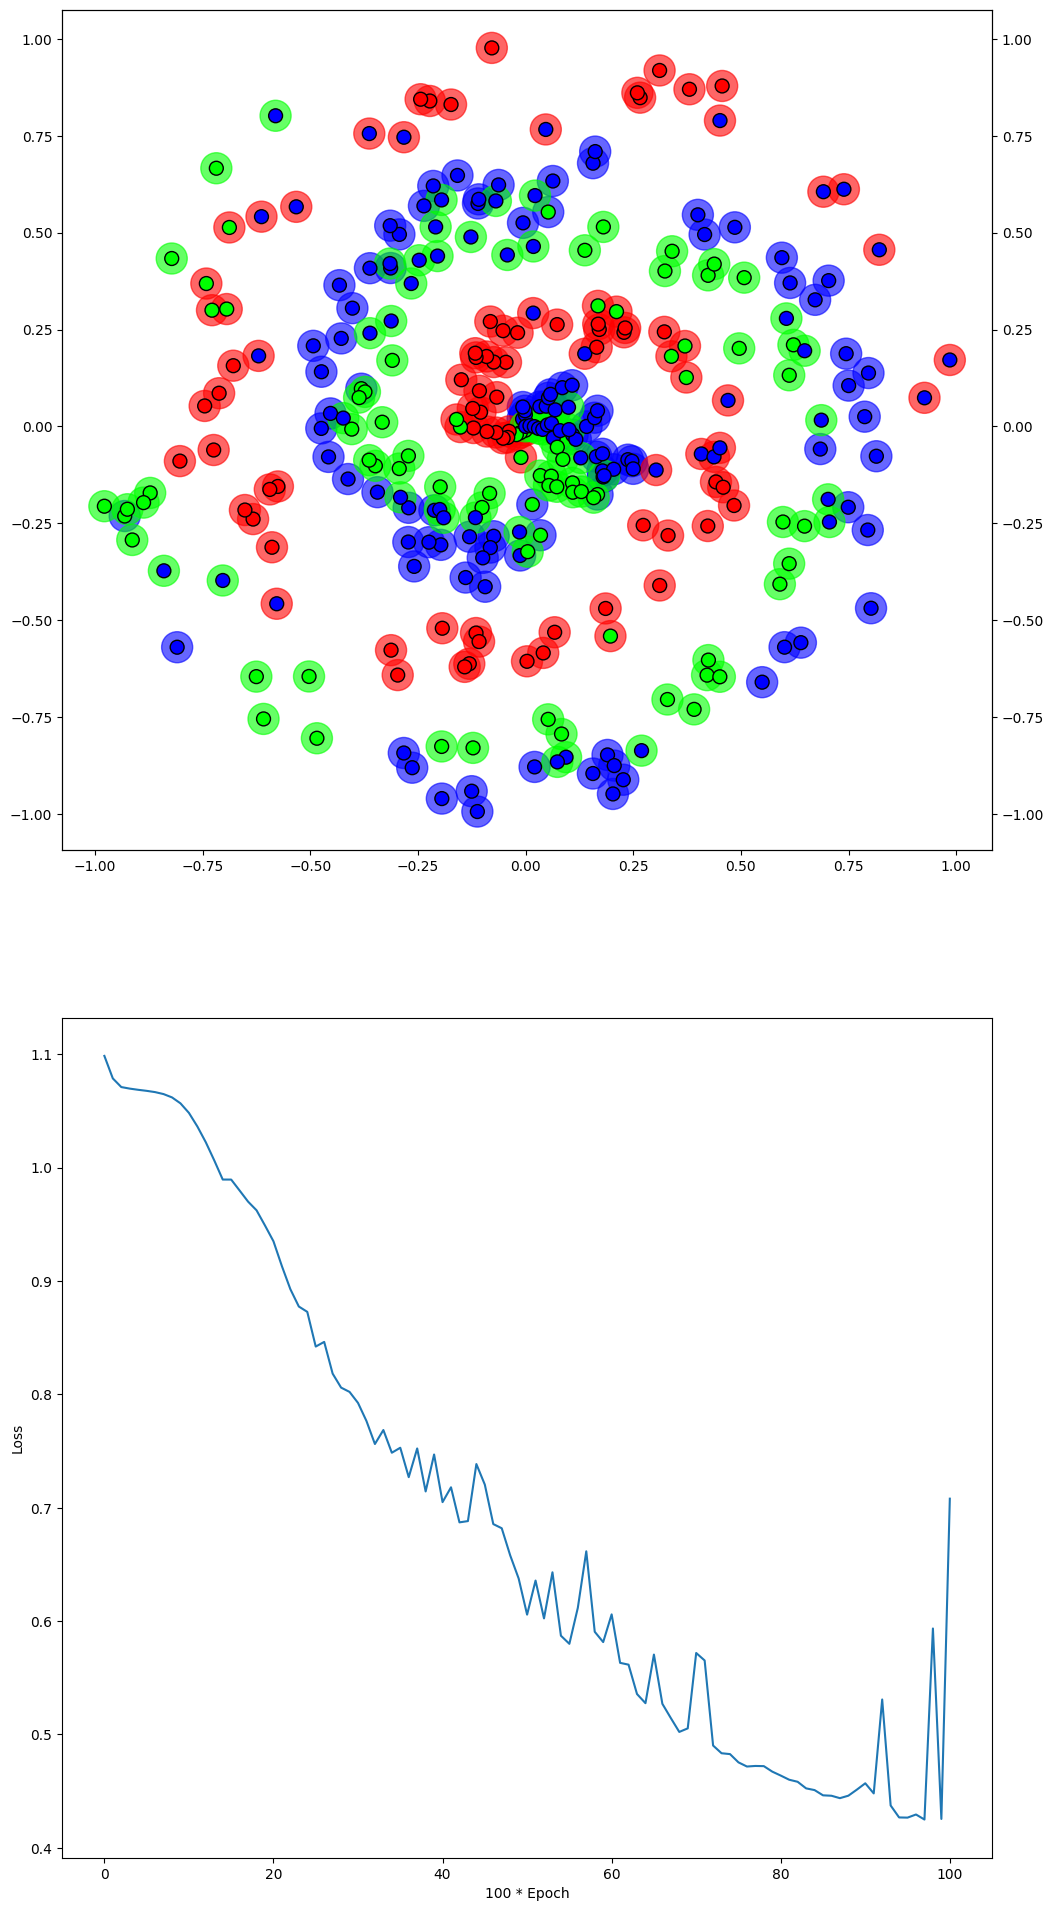

In [8]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2020)

class Layer_Dense:

    # Layer initialization
    # <=== HERE ===>
    def __init__(self, n_inputs, n_neurons,
                         weight_regularizer_l1=0, 
                         weight_regularizer_l2=0,
                         bias_regularizer_l1=0, 
                         bias_regularizer_l2=0):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        # Set regularization strength
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2
    # <=== HERE ===>

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        # <=== HERE ===>
        # Gradients on regularization
        # L1 on weights
        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1
        # L2 on weights
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights
        # L1 on biases
        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1
        # L2 on biases
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases
        # <=== HERE ===>
        
        
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)



# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):

        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):

        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in \
                enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output and
            jacobian_matrix = np.diagflat(single_output) - \
                              np.dot(single_output, single_output.T)

            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix,
                                         single_dvalues)


# Common loss class
class Loss:
    
    # Regularization loss calculation
    def regularization_loss(self, layer):
        
        # <=== HERE ===>
        # 0 by default
        regularization_loss = 0

        # L1 regularization - weights
        # calculate only when factor greater than 0
        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1 * np.sum(np.abs(layer.weights))

        # L2 regularization - weights
        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)


        # L1 regularization - biases
        # calculate only when factor greater than 0
        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases))

        # L2 regularization - biases
        if layer.bias_regularizer_l2 > 0:
            regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)

        return regularization_loss
        # <=== HERE ===>

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]


        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)


    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


        
# SGD optimizer
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1., decay=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.current_learning_rate * layer.dweights
        layer.biases += -self.current_learning_rate * layer.dbiases

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 128)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(128, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD(learning_rate=1, decay=1e-4)

# Train in loop
losses = [] # Used to plot loss values and see how our model learned
for epoch in range(10_001):

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)
    
    
    # <=== HERE ===>
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    data_loss = loss_activation.forward(dense2.output, y)
    
    # Calculate regularization penalty
    regularization_loss = \
        loss_activation.loss.regularization_loss(dense1) + \
        loss_activation.loss.regularization_loss(dense2)

    # Calculate overall loss
    loss = data_loss + regularization_loss
    # <=== HERE ===>
    
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    if not epoch % 100:
        
        # <=== HERE ===>
        losses.append(data_loss)
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f} (' +
              f'data_loss: {data_loss:.3f}, ' +
              f'reg_loss: {regularization_loss:.3f}), ' +
              f'lr: {optimizer.current_learning_rate}')
        # <=== HERE ===>
        
    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

    
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 24))
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = axs[0].twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")

axs[1].plot(range(len(losses)), losses)
axs[1].set_xlabel("100 * Epoch")
axs[1].set_ylabel("Loss")
plt.show()

acc: 0.677, loss: 1.075


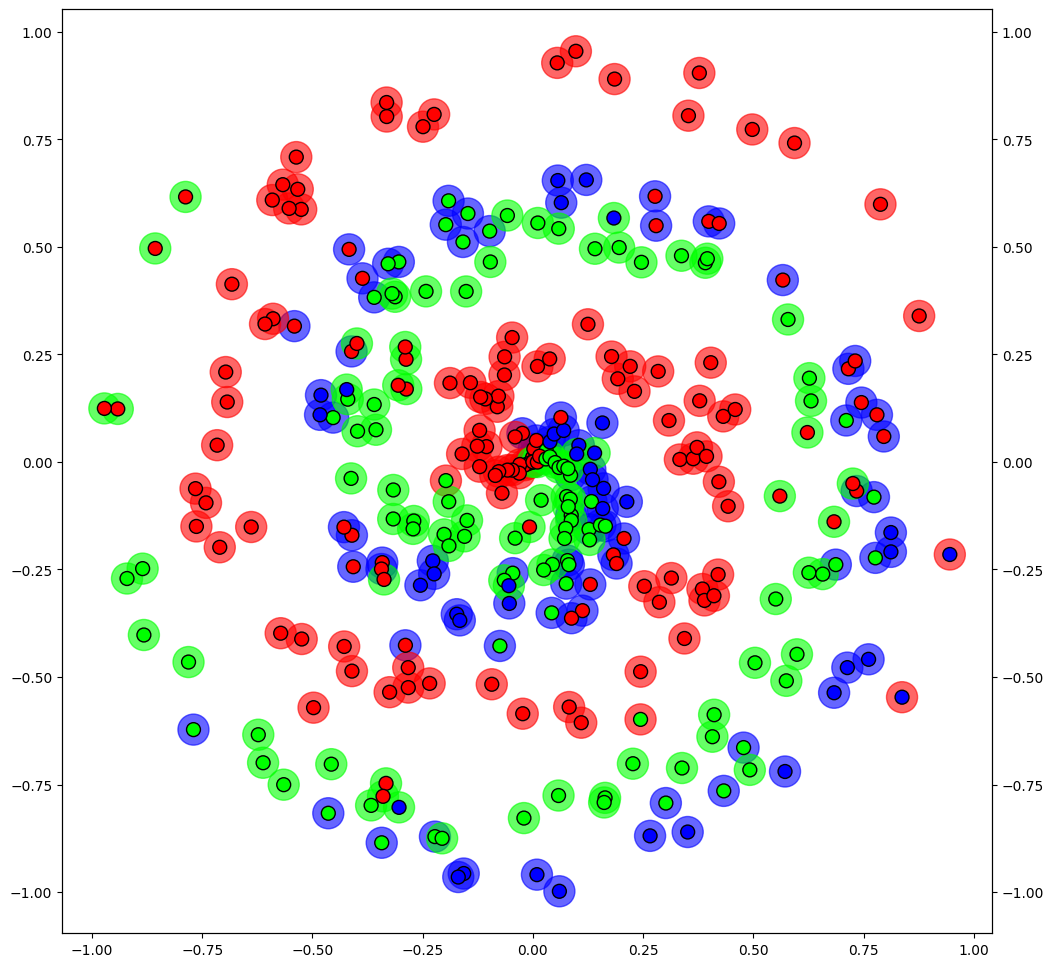

In [9]:
# Validate the model

# Create test dataset
X_test, y_test = spiral_data(samples=100, classes=3)

# Perform a forward pass of our training data through this layer
dense1.forward(X_test)

# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y_test)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions==y_test)

print(f'acc: {accuracy:.3f}, loss: {loss:.3f}')

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

---

epoch: 0, acc: 0.379, loss: 1.099 (data_loss: 1.099, reg_loss: 0.000), lr: 1
epoch: 100, acc: 0.421, loss: 1.074 (data_loss: 1.074, reg_loss: 0.000), lr: 0.9901970492127933
epoch: 200, acc: 0.415, loss: 1.068 (data_loss: 1.068, reg_loss: 0.000), lr: 0.9804882831650161
epoch: 300, acc: 0.411, loss: 1.067 (data_loss: 1.067, reg_loss: 0.000), lr: 0.9709680551509855
epoch: 400, acc: 0.410, loss: 1.067 (data_loss: 1.067, reg_loss: 0.000), lr: 0.9616309260505818
epoch: 500, acc: 0.409, loss: 1.067 (data_loss: 1.067, reg_loss: 0.000), lr: 0.9524716639679969
epoch: 600, acc: 0.411, loss: 1.066 (data_loss: 1.066, reg_loss: 0.000), lr: 0.9434852344560807
epoch: 700, acc: 0.410, loss: 1.064 (data_loss: 1.064, reg_loss: 0.000), lr: 0.9346667912889054
epoch: 800, acc: 0.412, loss: 1.061 (data_loss: 1.061, reg_loss: 0.000), lr: 0.9260116677470135
epoch: 900, acc: 0.419, loss: 1.055 (data_loss: 1.055, reg_loss: 0.000), lr: 0.9175153683824203
epoch: 1000, acc: 0.427, loss: 1.045 (data_loss: 1.045, reg

epoch: 8500, acc: 0.827, loss: 0.449 (data_loss: 0.449, reg_loss: 0.000), lr: 0.5405697605275961
epoch: 8600, acc: 0.801, loss: 0.477 (data_loss: 0.477, reg_loss: 0.000), lr: 0.5376633152320017
epoch: 8700, acc: 0.803, loss: 0.475 (data_loss: 0.475, reg_loss: 0.000), lr: 0.5347879565752179
epoch: 8800, acc: 0.832, loss: 0.447 (data_loss: 0.447, reg_loss: 0.000), lr: 0.5319431884674717
epoch: 8900, acc: 0.805, loss: 0.471 (data_loss: 0.471, reg_loss: 0.000), lr: 0.5291285253188
epoch: 9000, acc: 0.808, loss: 0.468 (data_loss: 0.468, reg_loss: 0.000), lr: 0.5263434917627243
epoch: 9100, acc: 0.841, loss: 0.436 (data_loss: 0.436, reg_loss: 0.000), lr: 0.5235876223886068
epoch: 9200, acc: 0.809, loss: 0.465 (data_loss: 0.465, reg_loss: 0.000), lr: 0.5208604614823689
epoch: 9300, acc: 0.814, loss: 0.462 (data_loss: 0.462, reg_loss: 0.000), lr: 0.5181615627752734
epoch: 9400, acc: 0.849, loss: 0.429 (data_loss: 0.429, reg_loss: 0.000), lr: 0.5154904892004742
epoch: 9500, acc: 0.815, loss: 0.

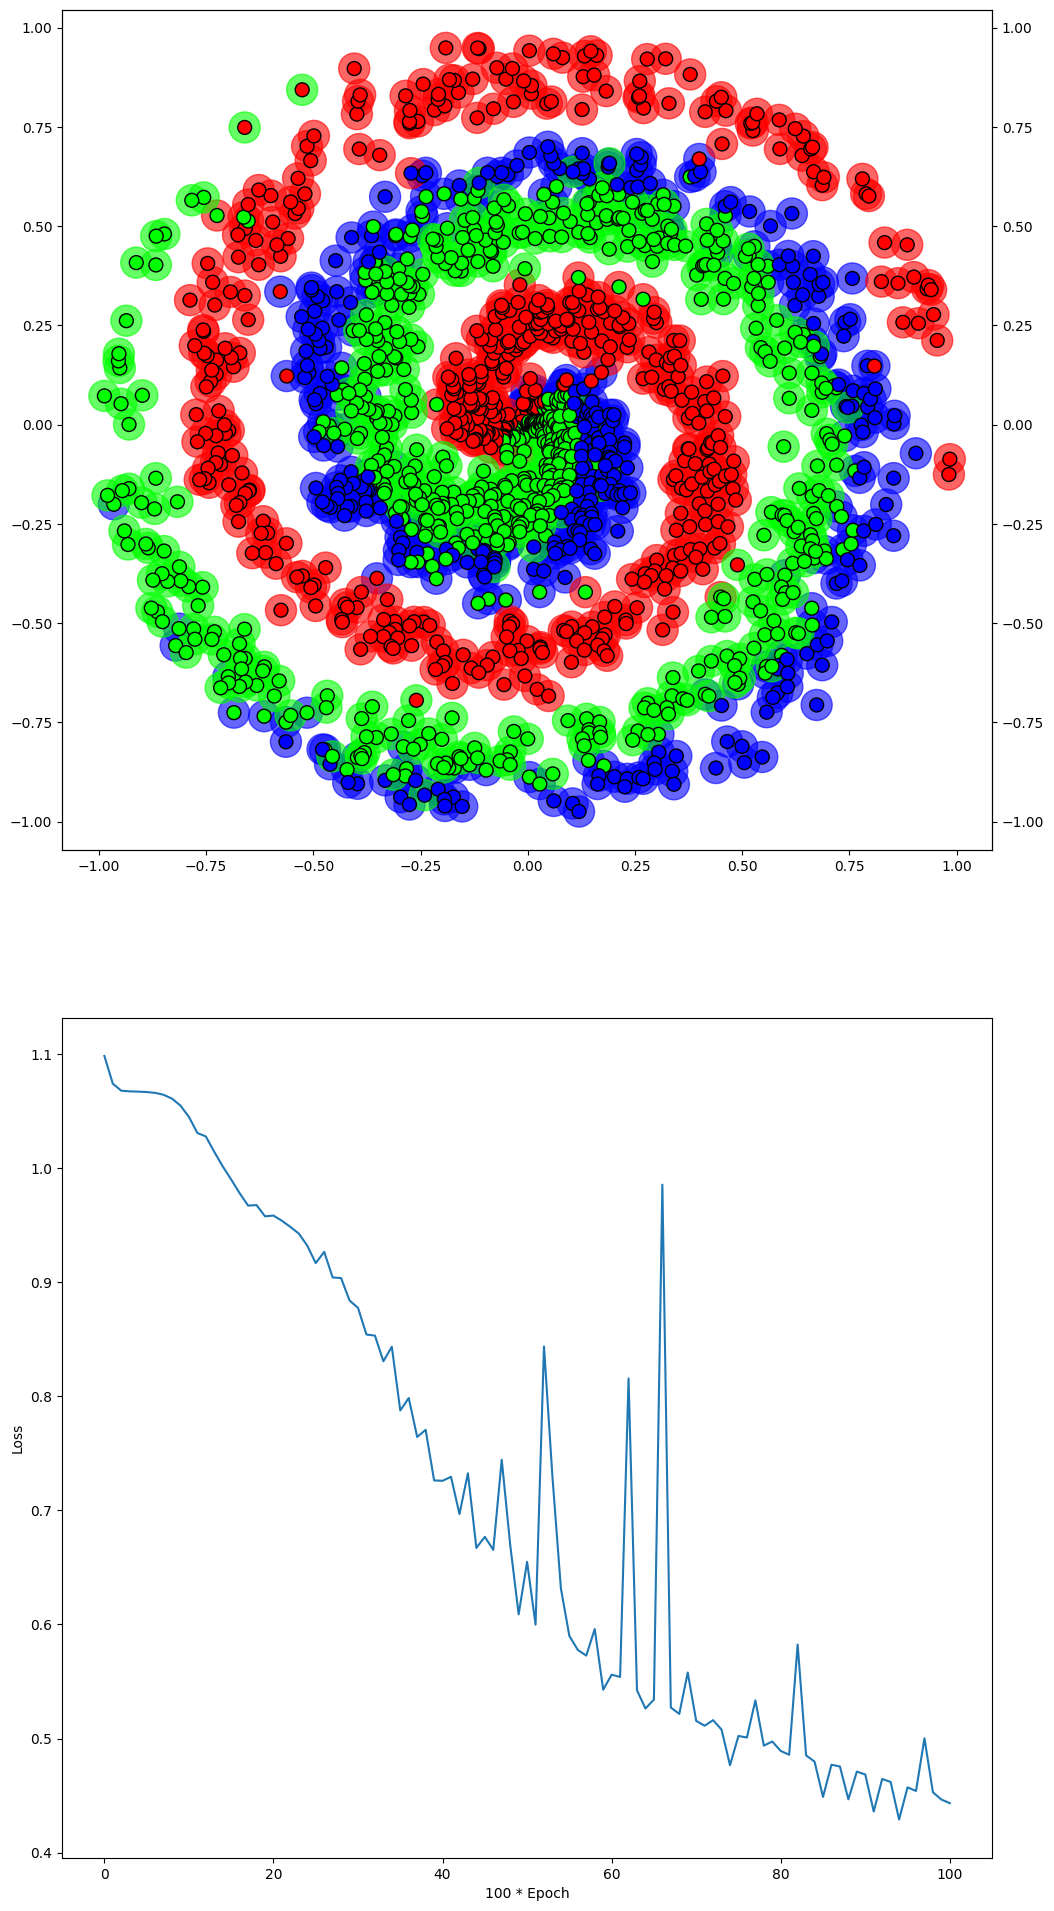

In [10]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2020)

class Layer_Dense:

    # Layer initialization
    # <=== HERE ===>
    def __init__(self, n_inputs, n_neurons,
                         weight_regularizer_l1=0, 
                         weight_regularizer_l2=0,
                         bias_regularizer_l1=0, 
                         bias_regularizer_l2=0):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        # Set regularization strength
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2
    # <=== HERE ===>

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        # <=== HERE ===>
        # Gradients on regularization
        # L1 on weights
        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1
        # L2 on weights
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights
        # L1 on biases
        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1
        # L2 on biases
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases
        # <=== HERE ===>
        
        
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)



# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):

        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):

        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in \
                enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output and
            jacobian_matrix = np.diagflat(single_output) - \
                              np.dot(single_output, single_output.T)

            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix,
                                         single_dvalues)


# Common loss class
class Loss:
    
    # Regularization loss calculation
    def regularization_loss(self, layer):
        
        # <=== HERE ===>
        # 0 by default
        regularization_loss = 0

        # L1 regularization - weights
        # calculate only when factor greater than 0
        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1 * np.sum(np.abs(layer.weights))

        # L2 regularization - weights
        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)


        # L1 regularization - biases
        # calculate only when factor greater than 0
        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases))

        # L2 regularization - biases
        if layer.bias_regularizer_l2 > 0:
            regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)

        return regularization_loss
        # <=== HERE ===>

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]


        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)


    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


        
# SGD optimizer
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1., decay=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.current_learning_rate * layer.dweights
        layer.biases += -self.current_learning_rate * layer.dbiases

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


# Create dataset
X, y = spiral_data(samples=500, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 128)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(128, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD(learning_rate=1, decay=1e-4)

# Train in loop
losses = [] # Used to plot loss values and see how our model learned
for epoch in range(10_001):

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)
    
    
    # <=== HERE ===>
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    data_loss = loss_activation.forward(dense2.output, y)
    
    # Calculate regularization penalty
    regularization_loss = \
        loss_activation.loss.regularization_loss(dense1) + \
        loss_activation.loss.regularization_loss(dense2)

    # Calculate overall loss
    loss = data_loss + regularization_loss
    # <=== HERE ===>
    
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    if not epoch % 100:
        
        # <=== HERE ===>
        losses.append(data_loss)
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f} (' +
              f'data_loss: {data_loss:.3f}, ' +
              f'reg_loss: {regularization_loss:.3f}), ' +
              f'lr: {optimizer.current_learning_rate}')
        # <=== HERE ===>
        
    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

    
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 24))
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = axs[0].twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")

axs[1].plot(range(len(losses)), losses)
axs[1].set_xlabel("100 * Epoch")
axs[1].set_ylabel("Loss")
plt.show()

acc: 0.757, loss: 0.466


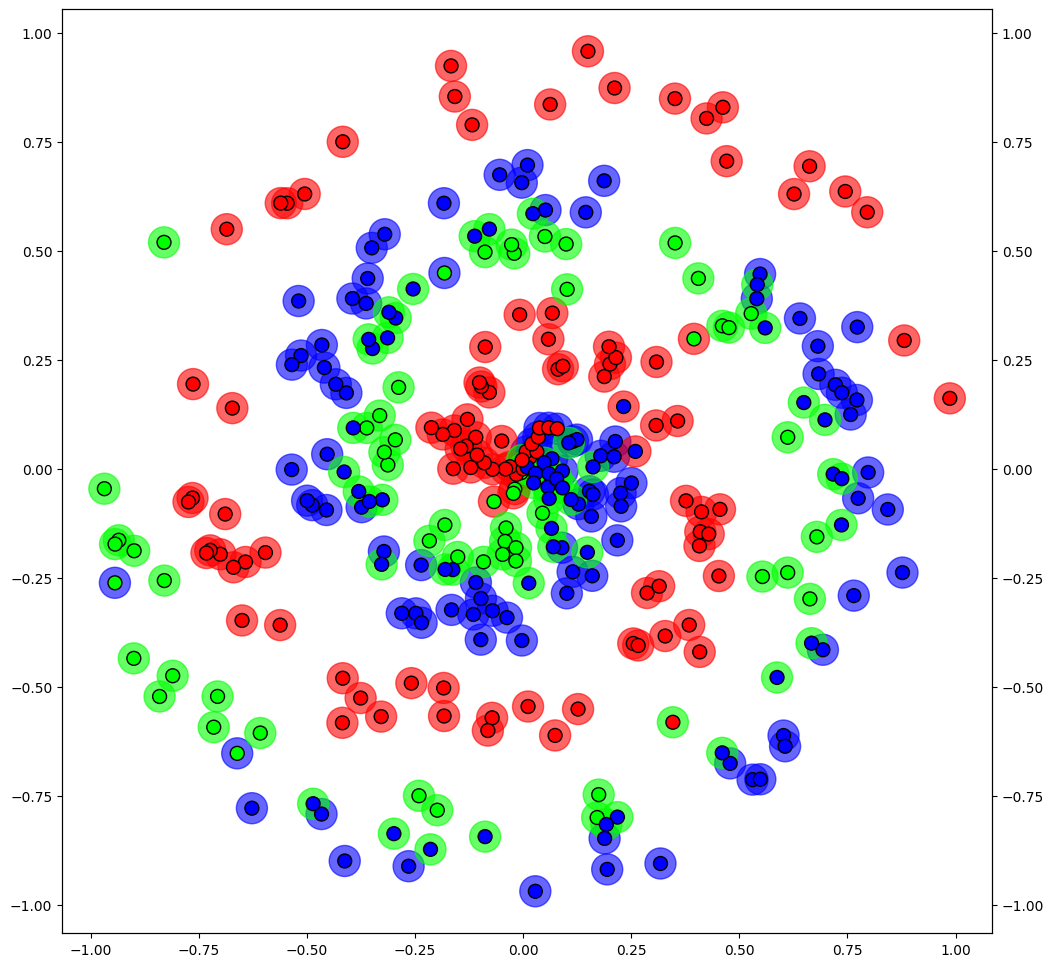

In [11]:
# Validate the model

# Create test dataset
X_test, y_test = spiral_data(samples=100, classes=3)

# Perform a forward pass of our training data through this layer
dense1.forward(X_test)

# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y_test)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions==y_test)

print(f'acc: {accuracy:.3f}, loss: {loss:.3f}')

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

---

# Realni primer

<a href="https://archive.ics.uci.edu/ml/datasets/iris"><b>Iris Data Set</b></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
   sepal-length  sepal-width  petal-length  petal-width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0


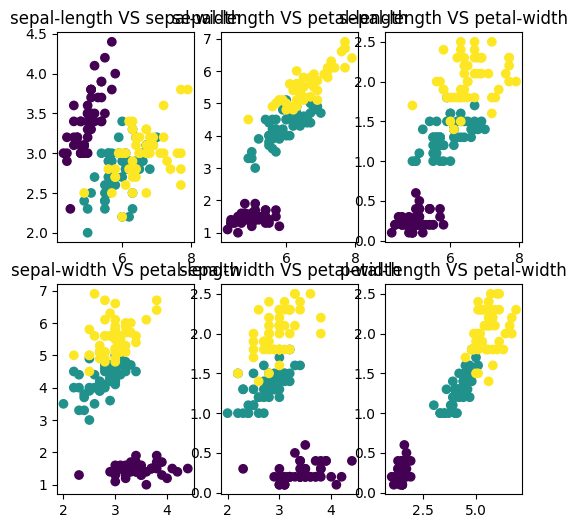

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data/iris.data", header=None, names=["sepal-length", "sepal-width", "petal-length", "petal-width", "class"])

colors = {"Iris-setosa": 0,
         "Iris-versicolor": 1,
         "Iris-virginica": 2}

for key, value in colors.items():
    filter_ = data["class"] == key
    data.loc[filter_, "class"] = value
data["class"] = pd.to_numeric(data["class"]) # before, pandas took them as strings. But we need them as integers for our AI model

print(data.info())
print(data.head())

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(6, 6))
axs[0][0].scatter(data["sepal-length"], data["sepal-width"], c=data["class"])
axs[0][0].set_title("sepal-length VS sepal-width")

axs[0][1].scatter(data["sepal-length"], data["petal-length"], c=data["class"])
axs[0][1].set_title("sepal-length VS petal-length")

axs[0][2].scatter(data["sepal-length"], data["petal-width"], c=data["class"])
axs[0][2].set_title("sepal-length VS petal-width")

axs[1][0].scatter(data["sepal-width"], data["petal-length"], c=data["class"])
axs[1][0].set_title("sepal-width VS petal-length")

axs[1][1].scatter(data["sepal-width"], data["petal-width"], c=data["class"])
axs[1][1].set_title("sepal-width VS petal-width")

axs[1][2].scatter(data["petal-length"], data["petal-width"], c=data["class"])
axs[1][2].set_title("petal-length VS petal-width")

plt.show()

----

In [18]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=420)
print(X_train[:5])
print(y_train[:5])

[[6.2 3.4 5.4 2.3]
 [5.5 3.5 1.3 0.2]
 [5.1 3.8 1.5 0.3]
 [5.8 2.8 5.1 2.4]
 [6.1 3.  4.9 1.8]]
[2 0 0 2 2]


epoch: 0, acc: 0.620, loss: 1.098, lr: 0.005
epoch: 100, acc: 0.380, loss: 1.095, lr: 0.004549590536851684
epoch: 200, acc: 0.380, loss: 1.091, lr: 0.004170141784820684
epoch: 300, acc: 0.380, loss: 1.084, lr: 0.003849114703618168
epoch: 400, acc: 0.380, loss: 1.071, lr: 0.0035739814152966403
epoch: 500, acc: 0.380, loss: 1.049, lr: 0.00333555703802535
epoch: 600, acc: 0.380, loss: 1.022, lr: 0.0031269543464665416
epoch: 700, acc: 0.380, loss: 0.989, lr: 0.002942907592701589
epoch: 800, acc: 0.570, loss: 0.948, lr: 0.0027793218454697055
epoch: 900, acc: 0.710, loss: 0.900, lr: 0.0026329647182727752
epoch: 1000, acc: 0.710, loss: 0.854, lr: 0.002501250625312656
epoch: 1100, acc: 0.710, loss: 0.810, lr: 0.0023820867079561697
epoch: 1200, acc: 0.710, loss: 0.766, lr: 0.002273760800363802
epoch: 1300, acc: 0.710, loss: 0.723, lr: 0.002174858634188778
epoch: 1400, acc: 0.710, loss: 0.683, lr: 0.0020842017507294707
epoch: 1500, acc: 0.710, loss: 0.646, lr: 0.0020008003201280513
epoch: 1600, 

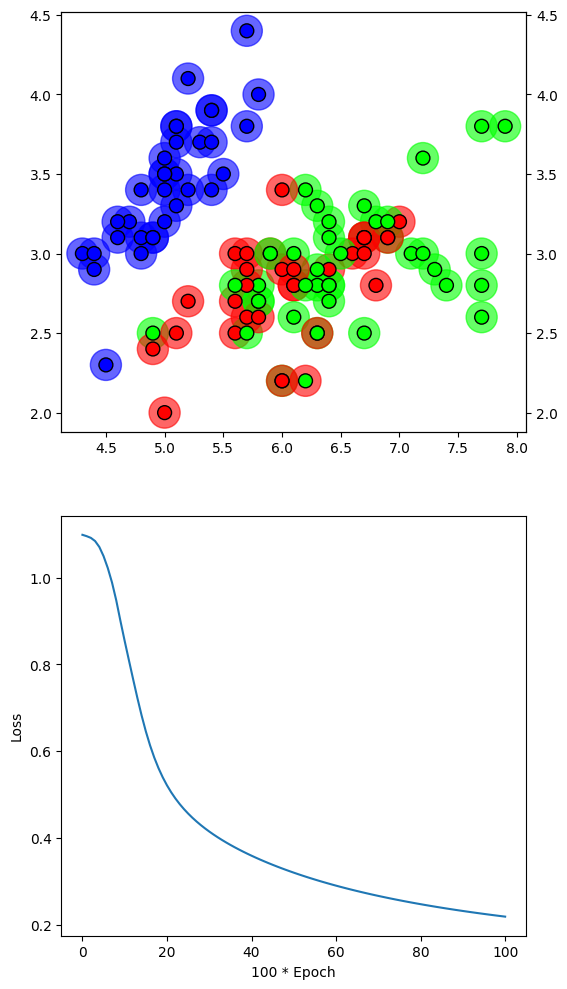

In [20]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2020)

class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons,
                         weight_regularizer_l1=0, 
                         weight_regularizer_l2=0,
                         bias_regularizer_l1=0, 
                         bias_regularizer_l2=0):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        # Set regularization strength
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        # Gradients on regularization
        # L1 on weights
        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1
        # L2 on weights
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights
        # L1 on biases
        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1
        # L2 on biases
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases

        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)



# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):

        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):

        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in \
                enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output and
            jacobian_matrix = np.diagflat(single_output) - \
                              np.dot(single_output, single_output.T)

            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix,
                                         single_dvalues)


# Common loss class
class Loss:
    
    # Regularization loss calculation
    def regularization_loss(self, layer):

        # 0 by default
        regularization_loss = 0

        # L1 regularization - weights
        # calculate only when factor greater than 0
        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1 * np.sum(np.abs(layer.weights))

        # L2 regularization - weights
        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)


        # L1 regularization - biases
        # calculate only when factor greater than 0
        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases))

        # L2 regularization - biases
        if layer.bias_regularizer_l2 > 0:
            regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)

        return regularization_loss

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]


        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)


    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


        
# SGD optimizer
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1., decay=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.current_learning_rate * layer.dweights
        layer.biases += -self.current_learning_rate * layer.dbiases

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

# <=== HERE ===>
# Create dataset
X = X_train
y = y_train

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(4, 16)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(16, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD(learning_rate=0.005, decay=1e-3)
# <=== HERE ===>

# Train in loop
losses = [] # Used to plot loss values and see how our model learned
for epoch in range(10_001):

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)
    
    
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    data_loss = loss_activation.forward(dense2.output, y)

    # Calculate regularization penalty
    regularization_loss = \
        loss_activation.loss.regularization_loss(dense1) + \
        loss_activation.loss.regularization_loss(dense2)

    # Calculate overall loss
    loss = data_loss + regularization_loss

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    if not epoch % 100:
        losses.append(data_loss)
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')
    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

    
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 12))
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = axs[0].twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")

axs[1].plot(range(len(losses)), losses)
axs[1].set_xlabel("100 * Epoch")
axs[1].set_ylabel("Loss")
plt.show()

acc: 0.940, loss: 0.297


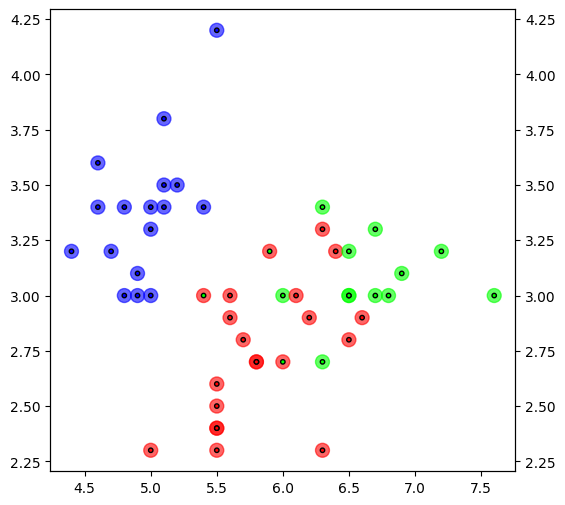

In [21]:
# <=== HERE ===>
# We have already devided dataset into training and testing
# <=== HERE ===>

# Perform a forward pass of our training data through this layer
dense1.forward(X_test)

# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)


# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y_test)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions==y_test)

print(f'acc: {accuracy:.3f}, loss: {loss:.3f}')

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="brg", marker="o", s=100, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap="brg", marker="o", s=10, edgecolors="black")
plt.show()

---

# Keras, Tensorflow

In [22]:
data = pd.read_csv("data/iris.data", header=None, names=["sepal-length", "sepal-width", "petal-length", "petal-width", "class"])
print(data.info())

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

print(X.head())
print(y.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
   sepal-length  sepal-width  petal-length  petal-width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object


In [23]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

print(y)

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

dummy_y = np_utils.to_categorical(encoded_Y)
print(dummy_y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.33, random_state=420)

## Creating Neural Network Model


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [27]:
model = Sequential()

In [28]:
model.add(Dense(16, input_dim=4, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [29]:
model.compile(loss="categorical_crossentropy",
             optimizer=Adam(learning_rate=0.005),
             metrics=["accuracy"])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


## Training

In [32]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 2.2079 - accuracy: 0.2900
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 1.5352 - accuracy: 0.4100
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0434 - accuracy: 0.6200
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7444 - accuracy: 0.6200
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6300 - accuracy: 0.7100
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5963 - accuracy: 0.7100
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5968 - accuracy: 0.7100
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5961 - accuracy: 0.7100
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5813 - accuracy: 0.7100
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.5602 - accuracy: 0.7100
Epoch 11/100
4/4 [=========

4/4 [==============================] - 0s 10ms/step - loss: 0.1569 - accuracy: 0.9700
Epoch 85/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1561 - accuracy: 0.9700
Epoch 86/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1565 - accuracy: 0.9600
Epoch 87/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1489 - accuracy: 0.9800
Epoch 88/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1513 - accuracy: 0.9700
Epoch 89/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1469 - accuracy: 0.9700
Epoch 90/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1438 - accuracy: 0.9800
Epoch 91/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1421 - accuracy: 0.9800
Epoch 92/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1403 - accuracy: 0.9800
Epoch 93/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1430 - accuracy: 0.9700
Epoch 94/100
4/4 [==============

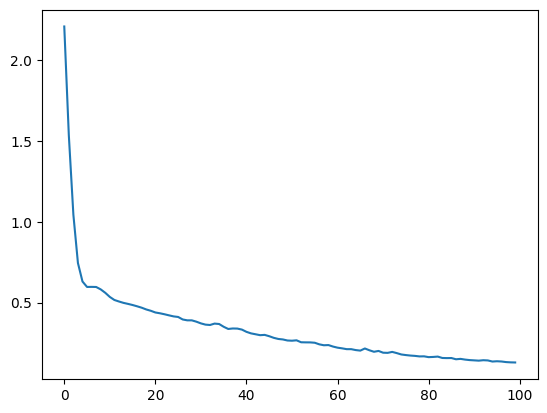

In [33]:
plt.plot(history.history["loss"])
plt.show()

## Evaluating the model

In [35]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}, \t Accuracy: {accuracy*100:.2f}%")

2/2 [==============================] - 0s 3ms/step - loss: 0.1895 - accuracy: 0.9600
Loss: 0.1895, 	 Accuracy: 96.00%


## Making predictions

In [36]:
predictions = model.predict(X_test)
print(predictions[:5])

2/2 [==============================] - 0s 2ms/step
[[3.6724571e-03 6.1725163e-01 3.7907591e-01]
 [3.4505038e-06 2.9470351e-02 9.7052616e-01]
 [9.6912731e-07 3.1166332e-02 9.6883273e-01]
 [9.8790586e-01 1.2093887e-02 1.7967815e-07]
 [9.8769647e-01 1.2303398e-02 1.2255482e-07]]


In [37]:
for prediction in predictions[:5]:
    print("Softmax output", prediction)
    
    i = np.argmax(prediction)
    flower_class = encoder.inverse_transform([i])
    print("Napoved", flower_class)

Softmax output [0.00367246 0.61725163 0.3790759 ]
Napoved ['Iris-versicolor']
Softmax output [3.4505038e-06 2.9470351e-02 9.7052616e-01]
Napoved ['Iris-virginica']
Softmax output [9.6912731e-07 3.1166332e-02 9.6883273e-01]
Napoved ['Iris-virginica']
Softmax output [9.8790586e-01 1.2093887e-02 1.7967815e-07]
Napoved ['Iris-setosa']
Softmax output [9.8769647e-01 1.2303398e-02 1.2255482e-07]
Napoved ['Iris-setosa']


2/2 [==============================] - 0s 2ms/step


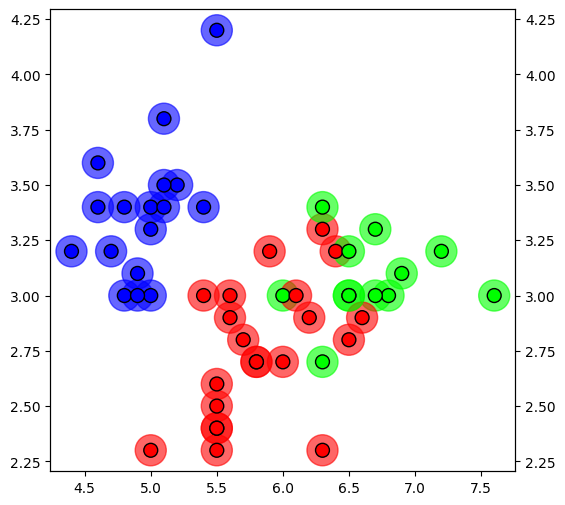

In [39]:
predictions = model.predict(X_test)


fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=np.argmax(y_test, axis=1), cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=np.argmax(y_test, axis=1), cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

# Save model

In [40]:
model.save("models/iris_new.h5")

2/2 [==============================] - 0s 6ms/step - loss: 0.1895 - accuracy: 0.9600
Loss: 0.1895 	 Accuracy: 96.00%
2/2 [==============================] - 0s 3ms/step


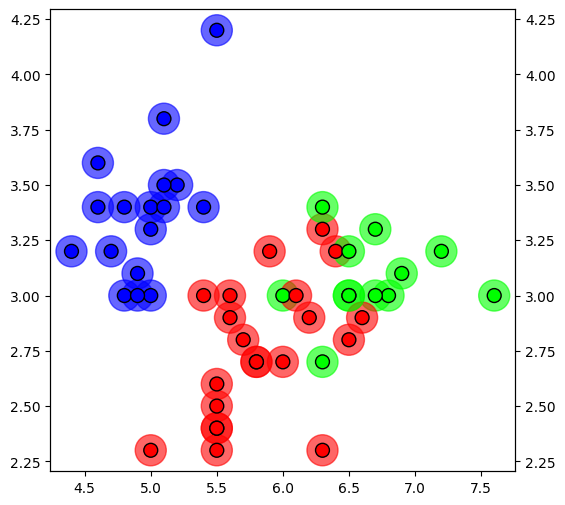

In [41]:
from tensorflow.keras.models import load_model
model2 = load_model("models/iris_new.h5")

loss, accuracy = model2.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f} \t Accuracy: {accuracy*100:.2f}%")

predictions = model2.predict(X_test)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=np.argmax(y_test, axis=1), cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=np.argmax(y_test, axis=1), cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

# Vaja

Ustvarite Dense model in ga uporabite na *Prima Indians onset of diabetes* datasetu. Naredite klasifikacijo ali je oseba dobila diabetes v roku 5 let ali ne.

## Load data

*Prima Indians onset of diabetes dataset* opisuje zdravstvene podatke pacientov Prima Indians porekla in napoveduje ali so imeli diabetes v roku 5 let ali ne.

Dataset je namenjen binarni klasifikaciji:
* **1** - So dobili diabetes
* **0** - Niso dobili diabetes



In [42]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [43]:
columns = [
    "Number of times pregnant",
    "Plasma glucose concentration a 2 hours in an oral glucose tolerance test",
    "Diastolic blood pressure (mm Hg)",
    "Triceps skin fold thickness (mm)",
    "2-Hour serum insulin (mu U/ml)",
    "Body mass index (weight in kg/(height in m)^2)",
    "Diabetes pedigree function",
    "Age (years)",
    "Class variable"
]
data = pd.read_csv("data/pima-indians-diabetes.data.csv", names=columns)
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [45]:
data.describe()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
num_samples = data.shape[0]
train_samples = 0.8 # % of how much samples to have in the training dataset

X_train = data.iloc[:int(num_samples*train_samples), :-1]
y_train = data.iloc[:int(num_samples*train_samples), -1]
X_test = data.iloc[int(num_samples*train_samples):, :-1]
y_test = data.iloc[int(num_samples*train_samples):, -1]

In [47]:
scaling_min = X_train.min()
scaling_max = X_train.max()

def data_scaling(data, scaling_min, scaling_max):
    return (data-scaling_min)/(scaling_max - scaling_min)

X_train = data_scaling(X_train, scaling_min, scaling_max)
X_test = data_scaling(X_test, scaling_min, scaling_max)

X_train.describe() # More met vse min na 0 in vse max na 1
# X_test.describe() ne bomo nč vn razbral ker ne rabi met od 0 do 1

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.223606,0.608323,0.561662,0.208650,0.094917,0.475267,0.172152,0.203284
std,0.196835,0.165171,0.160722,0.161194,0.137877,0.118856,0.143837,0.196213
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.500000,0.524590,0.000000,0.000000,0.403875,0.072588,0.050000
50%,0.176471,0.585859,0.573770,0.232323,0.043735,0.476900,0.131725,0.133333
75%,0.352941,0.712121,0.655738,0.323232,0.148936,0.543964,0.242955,0.316667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
model = Sequential()
model.add(Dense(31, input_dim=8, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer=Adam(learning_rate=0.001),
             metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 31)                279       
                                                                 
 dense_9 (Dense)             (None, 16)                512       
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 808
Trainable params: 808
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.5423
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6709 - accuracy: 0.6384
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.6531
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6566 - accuracy: 0.6531
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6518 - accuracy: 0.6531
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6478 - accuracy: 0.6531
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6440 - accuracy: 0.6531
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6399 - accuracy: 0.6531
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6357 - accuracy: 0.6531
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6310 - accuracy: 0.6531
Epoch 11/

Epoch 83/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4347 - accuracy: 0.7915
Epoch 84/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4343 - accuracy: 0.7915
Epoch 85/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4337 - accuracy: 0.7932
Epoch 86/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4323 - accuracy: 0.7964
Epoch 87/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4319 - accuracy: 0.7932
Epoch 88/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4315 - accuracy: 0.7980
Epoch 89/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4316 - accuracy: 0.7932
Epoch 90/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4326 - accuracy: 0.7980
Epoch 91/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4302 - accuracy: 0.7964
Epoch 92/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4321 - accuracy: 0.7915


In [56]:
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy

5/5 [==============================] - 0s 4ms/step - loss: 0.4718 - accuracy: 0.7727


(0.4717787802219391, 0.7727272510528564)

In [58]:
predictions = model.predict(X_test)
predictions = np.where(predictions > 0.5, 1, 0)

for i in range(5):
    print(X_test.iloc[i, :])
    print(predictions[i][0], "Real", y_test.iloc[i])
    print()

5/5 [==============================] - 0s 2ms/step
Number of times pregnant                                                    0.647059
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0.696970
Diastolic blood pressure (mm Hg)                                            0.606557
Triceps skin fold thickness (mm)                                            0.262626
2-Hour serum insulin (mu U/ml)                                              0.170213
Body mass index (weight in kg/(height in m)^2)                              0.538003
Diabetes pedigree function                                                  0.204526
Age (years)                                                                 0.483333
Name: 614, dtype: float64
1 Real 1

Number of times pregnant                                                    0.176471
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0.535354
Diastolic blood pressure (mm Hg)                               